This python program identifies the historical periods when the price movement pattern is similar to that in a specified period. For example, in Feb to May 2020, SP500 price experienced unprecendent rapid decline and recovery, we can use this program to find out historical periods when the price experienced similar changes.  

In [1]:
"""
Created on SUN JULY 26, 2000
@author: JW5458
"""
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
filename=".\Data\^GSPC.csv"
data=pd.read_csv(filename,index_col='Date', parse_dates=True)[['Adj Close','Volume']].sort_index(ascending=True)

In [3]:
window_end=dt.datetime(2020,7,24)   # specify the end date of the target period
window_size=200   # of calendar days in the target period
window_begin=window_end-dt.timedelta(days=window_size)
datei=np.logical_and(data.index>=window_begin,data.index<=window_end)
data_target=data[datei]['Adj Close'].sort_index(ascending=True)   # price dat ain the target period
window_target=data_target.shape[0]  # the length of target window
data_target_drop=1-np.min(data_target.values)/np.max(data_target.values)  # price Max drop % in the target data

In [4]:
index_range=np.arange(0,data.index.shape[0]-window_target)    # the range of dates in which we search for similar periods in history
data['corr']=0             # correlaton with target period
data['drop']=0             # price dropdown 
print(data.shape)

(23251, 4)


In [5]:
for ii in index_range: # loop to 
    print(data.index[ii])    
    if data.index[ii]<=window_begin-dt.timedelta(days=window_size) or data.index[ii]>=window_end+dt.timedelta(days=window_size):  # searched period not too close to target period
        data_window=data[ii:ii+window_target]['Adj Close'].sort_index(ascending=True)
        data.loc[data.index[ii],'corr']=np.corrcoef(data_target.values,data_window.values)[0][1]    # find correlation coefficient
        data.loc[data.index[ii],'drop']=1-np.min(data_window.values)/np.max(data_window.values)     # find price drop down % in search period

2016-01-14 00:00:00
2016-01-15 00:00:00
2016-01-19 00:00:00
2016-01-20 00:00:00
2016-01-21 00:00:00
2016-01-22 00:00:00
2016-01-25 00:00:00
2016-01-26 00:00:00
2016-01-27 00:00:00
2016-01-28 00:00:00
2016-01-29 00:00:00
2016-02-01 00:00:00
2016-02-02 00:00:00
2016-02-03 00:00:00
2016-02-04 00:00:00
2016-02-05 00:00:00
2016-02-08 00:00:00
2016-02-09 00:00:00
2016-02-10 00:00:00
2016-02-11 00:00:00
2016-02-12 00:00:00
2016-02-16 00:00:00
2016-02-17 00:00:00
2016-02-18 00:00:00
2016-02-19 00:00:00
2016-02-22 00:00:00
2016-02-23 00:00:00
2016-02-24 00:00:00
2016-02-25 00:00:00
2016-02-26 00:00:00
2016-02-29 00:00:00
2016-03-01 00:00:00
2016-03-02 00:00:00
2016-03-03 00:00:00
2016-03-04 00:00:00
2016-03-07 00:00:00
2016-03-08 00:00:00
2016-03-09 00:00:00
2016-03-10 00:00:00
2016-03-11 00:00:00
2016-03-14 00:00:00
2016-03-15 00:00:00
2016-03-16 00:00:00
2016-03-17 00:00:00
2016-03-18 00:00:00
2016-03-21 00:00:00
2016-03-22 00:00:00
2016-03-23 00:00:00
2016-03-24 00:00:00
2016-03-28 00:00:00


In [6]:
corr_array=data['corr'].values
drop_array=data['drop'].values
corr_array[drop_array<0.66*data_target_drop]=0  # consider periods with drop down % should be at least of that of target period

corr_index=np.argsort(corr_array)[::-1]    # sort correlation coefficient from high to low, return the index of sorted array in corr_index
corr_sorted=corr_array[corr_index]         # sorted correlatoin coefficient array
drop_sorted=drop_array[corr_index]         # corresponding drop down % array
index_max=[corr_index[0]]                  # the historical period with highest correlation with target period 

#corr_short=corr_index.remove(corr_sorted<0.6)
mindist=22*6   # minimum distance to target window in trading days (not calendar days), can't be too close, here is about 6 months

for ii in index_range:
    if len(index_max)>13:   # only consider the top 12 historical periods with highest correalatoin with target period
        break
    ifvalid=True
    for jj in np.arange(0,len(index_max)):
        if corr_index[ii]>index_max[jj]-mindist and corr_index[ii]<index_max[jj]+mindist:   
            ifvalid=False       # avoid periods which are close to already-selected historical periods, i.e., requires distinctive periods which are at least mindist trading days away from other historical periods
            break
    if ifvalid:
        index_max.append(corr_index[ii])
        print(data.index[index_max],corr_array[index_max],drop_array[index_max])

DatetimeIndex(['1940-03-20', '1970-03-11'], dtype='datetime64[ns]', name='Date', freq=None) [0.81362048 0.77572818] [0.28594122 0.23070945]
DatetimeIndex(['1940-03-20', '1970-03-11', '1929-09-04'], dtype='datetime64[ns]', name='Date', freq=None) [0.81362048 0.77572818 0.76309096] [0.28594122 0.23070945 0.44569994]
DatetimeIndex(['1940-03-20', '1970-03-11', '1929-09-04', '2008-12-09'], dtype='datetime64[ns]', name='Date', freq=None) [0.81362048 0.77572818 0.76309096 0.74967896] [0.28594122 0.23070945 0.44569994 0.28501073]
DatetimeIndex(['1940-03-20', '1970-03-11', '1929-09-04', '2008-12-09',
               '1998-06-23'],
              dtype='datetime64[ns]', name='Date', freq=None) [0.81362048 0.77572818 0.76309096 0.74967896 0.74835498] [0.28594122 0.23070945 0.44569994 0.28501073 0.24924515]
DatetimeIndex(['1940-03-20', '1970-03-11', '1929-09-04', '2008-12-09',
               '1998-06-23', '1933-08-07'],
              dtype='datetime64[ns]', name='Date', freq=None) [0.81362048 0.7757

In [7]:
df1=pd.DataFrame(index=data.index[index_max],columns=['price0','price1','corrcoef','price_drop%','price_1yearfromperiodend','return_1yearfromperiodend%','Max_drop_1yearfromperiodhigh%'])
days_into_future=252   # how far out in the future, 252 trading days, i.e., 1 year

for ii in np.arange(0,len(index_max)):
    data_i=index_max[ii]
    
    x1=data.index[data_i:data_i+window_target]
    y1=data[data_i:data_i+window_target]['Adj Close']
    df1.iloc[ii]['price0']=y1[0]   # price at beginning of the period
    df1.iloc[ii]['price1']=y1[-1]  # price at end of the period
    df1.iloc[ii]['corrcoef']= np.round(corr_array[data_i],2)
    df1.iloc[ii]['price_drop%']= np.round(-drop_array[data_i]*100,2)
    x2=data.index[data_i+window_target:data_i+window_target+days_into_future]
    y2=data[data_i+window_target:data_i+window_target+days_into_future]['Adj Close']
    df1.iloc[ii]['price_1yearfromperiodend']=y2[-1]
    df1.iloc[ii]['return_1yearfromperiodend%']=np.round((y2[-1]/y1[-1]-1)*100,2)
    df1.iloc[ii]['Max_drop_1yearfromperiodhigh%']=np.round((np.min(y2)/np.max(y1)-1)*100,2)

#print(df1.sort_values(by=['return_1year%']))
df1=df1.sort_index()
print(df1)
df1.to_csv(".\Result\HistoricalPattern_Similarto_Jan2020toJuly2020.csv")
print('mean 1 year return:', df1['return_1yearfromperiodend%'].mean().round(0), '%, std 1 year return:', df1['return_1yearfromperiodend%'].std().round(0),'%')

price0   price1 corrcoef price_drop% price_1yearfromperiodend  \
Date                                                                         
1929-09-04    31.72    24.57     0.76      -44.57                    16.69   
1930-09-25    19.73    15.96     0.64      -26.81                     6.03   
1932-03-14     8.31      8.1     0.66      -52.74                     9.85   
1933-08-07    10.05    10.76     0.75      -27.16                     8.47   
1938-01-17    11.67    12.38     0.68      -33.59                    11.78   
1940-03-20    12.14    10.72     0.81      -28.59                     9.98   
1946-07-16    17.97    15.83     0.68      -22.55                    14.19   
1962-04-02    69.37    56.34     0.69      -24.58                    73.32   
1970-03-11    88.69    82.83     0.78      -23.07                    98.15   
1974-07-03    84.25     70.7     0.61      -26.72                    98.86   
1982-04-01   113.79   136.58     0.61      -25.09                   170.43   

PermissionError: [Errno 13] Permission denied: '.\\Result\\HistoricalPattern_Similarto_Jan2020toJuly2020.csv'

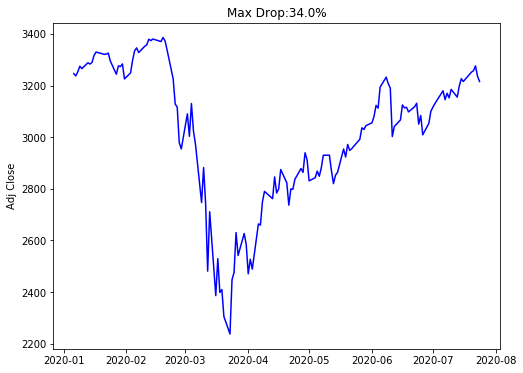

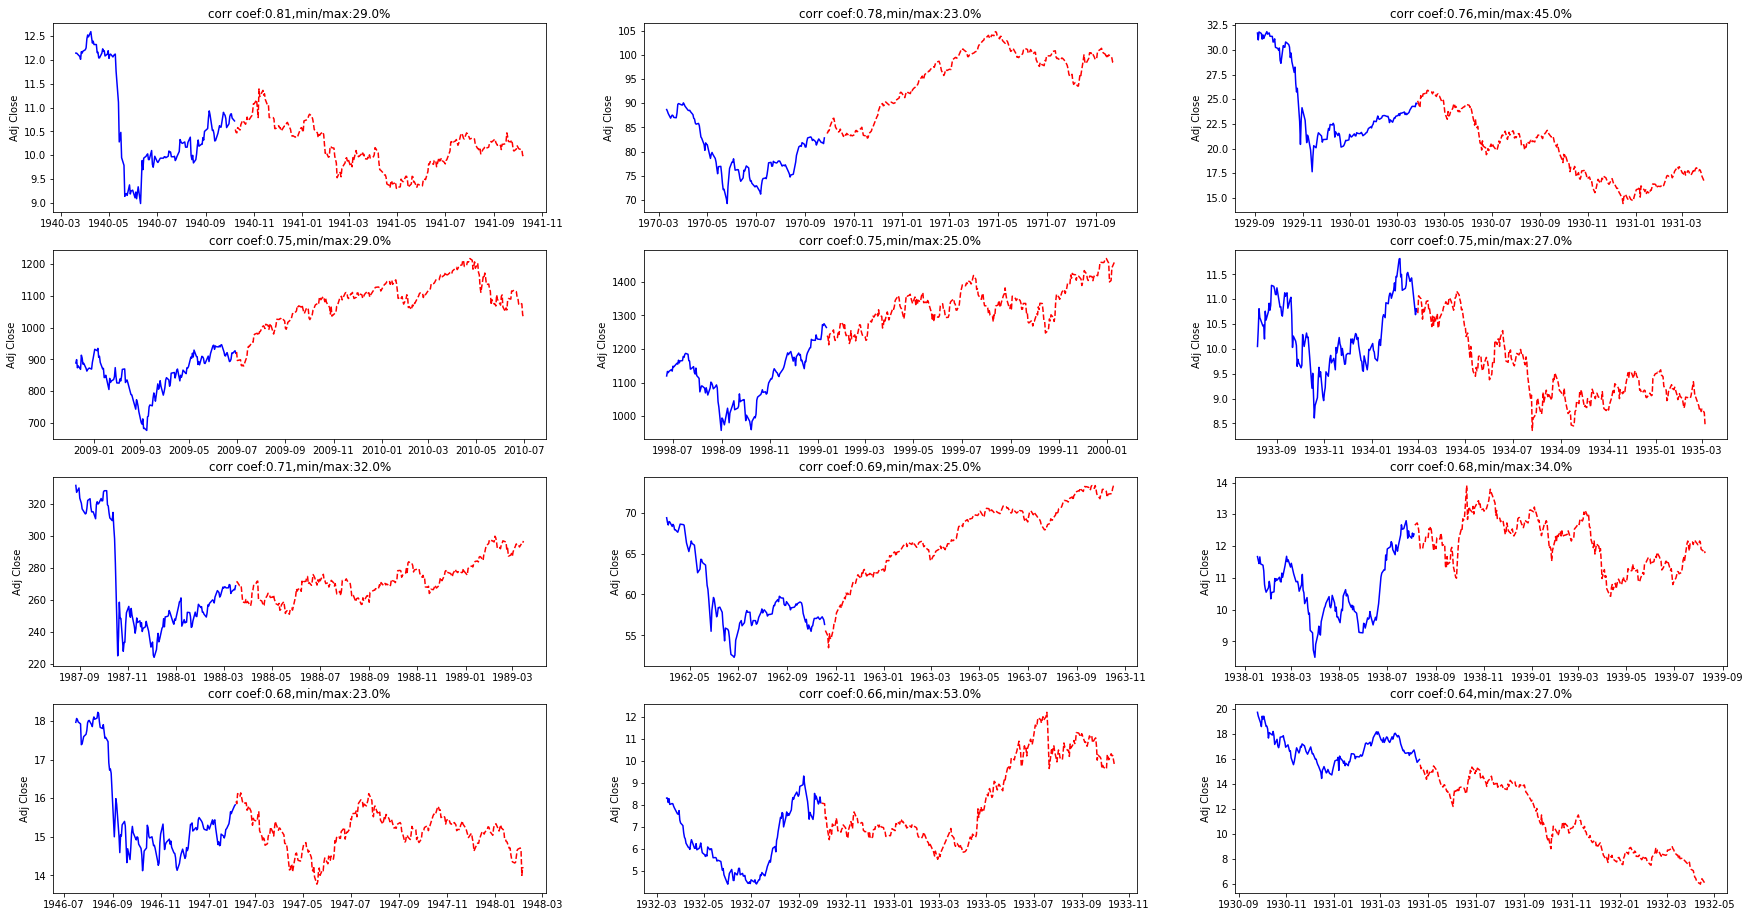

In [8]:
plt.figure(1,figsize=(8,6))
x1=data_target.index
y1=data_target.values

plt.plot(x1,y1,'b-')
#data_target.plot()
plt.ylabel('Adj Close')
plt.title('Max Drop:'+str(np.round(data_target_drop*100,0))+'%')


future_trading_days=252
plt.figure(2,figsize=(30,16))
for i in np.arange(1,13):
    if i<len(index_max):
        plt.subplot(4,3,i)
        data_i=index_max[i-1]
        corr0=corr_array[data_i]
        drop0=drop_array[data_i]
    
        x1=data.index[data_i:data_i+window_target]
        y1=data[data_i:data_i+window_target]['Adj Close']
        x2=data.index[data_i+window_target:data_i+window_target+future_trading_days]
        y2=data[data_i+window_target:data_i+window_target+future_trading_days]['Adj Close']
        plt.plot(x1,y1,'b-',x2,y2,'r--')
    
    #data.iloc[data_i:data_i+widen*window_target].plot()
        plt.ylabel('Adj Close')
        plt.title('corr coef:'+str(np.round(corr0,2))+',min/max:'+str(np.round(drop0*100,0))+'%')